# Melbourne Housing Market Analysis

## Overview 
#### The objective of this prokect is to analyse the data avaiable in Melbourne housing market from Jan 2016 to Sep 2017. This dataset includes the properties's address, type, landsize, room number and other information. 

#### There are three parts of this project, within each part, few questions will be answered.
### Part I: Data overview
#### Q1.  How many properties were on list during this period? how it distributes in different surburb?
#### Q2. In which surburb, the average price/median price of properties is most expensive. 
#### Q3. How the price distributes in different region?
#### Q4. What is the sales amount within this period for each surburb. (deleted)
#### Q5. Who are the top 5 agencies( how many properties have sold).
#### Q6. What is percentage of different property types in Melbourne?

### Part II: Factors that affect the property selling
#### Q7.  Is the distance to city will affect the property price?
#### Q8. Is there any busy season for the house selling?
#### Q9. Would the method of selling will affect the price?
#### Q10. Within a same suburb, is property type, land size, the amount of bedroom and bathroom, car park number will affect the price?

### Part III: Prediction
#### Q11. Predict the land price for each council
#### Q12. Predict the average property price by considering the interest rate policy

### 1. import library and dataset


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
house = pd.read_csv('melb_data.csv')
house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Aberfeldie,10 Caroline St,5,h,1830000,S,Rendina,23/9/2017,7.5,3040,...,4,4.0,730,373.0,2014.0,NaN,-37.75950,144.89427,Western Metropolitan,1543
1,Airport West,33 Bedford St,3,h,860000,S,Harcourts,23/9/2017,10.4,3042,...,2,2.0,593,NaN,NaN,NaN,-37.72057,144.87558,Western Metropolitan,3464
2,Airport West,16 Highridge Cr,3,h,850000,S,Brad,23/9/2017,10.4,3042,...,1,2.0,551,96.0,1950.0,NaN,-37.72739,144.88235,Western Metropolitan,3464
3,Albanvale,5 Hedgerow Ct,3,h,565000,S,Bells,23/9/2017,14.0,3021,...,1,2.0,619,NaN,NaN,NaN,-37.74521,144.76863,Western Metropolitan,1899
4,Albert Park,59 Moubray St,3,h,2100000,VB,Cayzer,23/9/2017,3.0,3206,...,2,NaN,137,125.0,1890.0,NaN,-37.84388,144.95303,Southern Metropolitan,3280


In [9]:
house.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

In [23]:
house.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### 2. Data Analysis

### Q1:How many properties were on list during this period? how it distributes in different regions?

In [10]:
house["Address"].nunique()

13378

#### There are 13378 properties listed on this period.

In [26]:
Region_number=house.groupby(by="Regionname",as_index=False).agg({"Address":pd.Series.nunique}).sort_values(by="Address",ascending=False)
Region_number

,Regionname,Address
5,Southern Metropolitan,4660
2,Northern Metropolitan,3838
6,Western Metropolitan,2907
0,Eastern Metropolitan,1466
4,South-Eastern Metropolitan,448
1,Eastern Victoria,53
3,Northern Victoria,41
7,Western Victoria,32


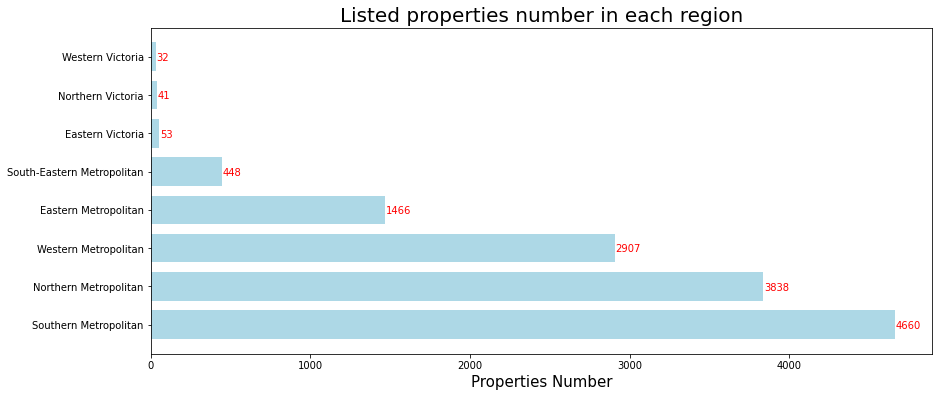

In [49]:
x=Region_number["Regionname"]
y=Region_number["Address"]
fig, ax =plt.subplots(figsize=(14,6))
width=0.75
ax.barh(x,y,width,color="lightblue")
ax.set_title("Listed properties number in each region",fontsize=20)
ax.set_xlabel("Properties Number",fontsize=15)
for i, v in enumerate(Region_number["Address"]):
    ax.text(v + 4, i-0.1 , str(v),
            color = 'red', fontsize=10)
plt.show()

#### Southern Metropolitan has the largest number of listed properties and western victoria has the smallest number.

### Q2. In which surburb, the average price/median price of properties is most expensive. 

In [72]:
mean_price=house.groupby(by="Suburb",as_index=False)["Price"].agg("mean").sort_values(by="Price",ascending=True).round(2)

In [74]:
mean_price.head(5)

,Suburb,Price
19,Bacchus Marsh,285000.00
243,Rockbank,340000.00
179,Kurunjang,353000.00
291,Wallan,366000.00
191,Melton South,380736.11


In [75]:
mean_price.tail(5)

,Suburb,Price
41,Brighton,1930158.00
4,Albert Park,1941355.07
195,Middle Park,2082529.41
60,Canterbury,2180240.74
178,Kooyong,2185000.00


In [77]:
median_price=house.groupby(by="Suburb",as_index=False)["Price"].agg("median").sort_values(by="Price",ascending=True).round(2)

In [78]:
median_price

,Suburb,Price
19,Bacchus Marsh,285000.0
243,Rockbank,340000.0
179,Kurunjang,353500.0
291,Wallan,366000.0
191,Melton South,390000.0
...,...,...
195,Middle Park,1880000.0
60,Canterbury,1890000.0
4,Albert Park,1900000.0
108,Eaglemont,1901000.0


#### Kooyong has the largest median and mean price. Bacchus Marsh has the lowest price.

### Q3. How the price distributes in different regions?

Text(0, 0.5, 'Number')

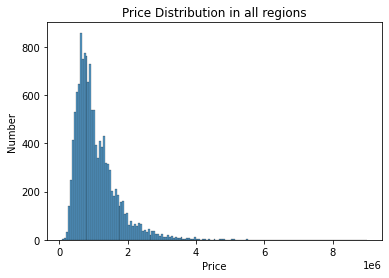

In [83]:
sns.histplot(data=house,x="Price").set(title="Price Distribution in all regions")
plt.ylabel("Number")

#### We could see the price of properties is mainly less then 1million.

In [84]:
house["Regionname"].unique()

array(['Western Metropolitan', 'Southern Metropolitan',
       'Eastern Metropolitan', 'Eastern Victoria',
       'South-Eastern Metropolitan', 'Northern Metropolitan',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [95]:
western_metropolitan=house["Price"].loc[house["Regionname"]=="Western Metropolitan"].values
southern_metropolitan=house["Price"].loc[house["Regionname"]=="Southern Metropolitan"].values
eastern_metropolitan=house["Price"].loc[house["Regionname"]=="Eastern Metropolitan"].values
eastern_victoria=house["Price"].loc[house["Regionname"]=="Eastern Victoria"].values
south_eastern_metropolitan=house["Price"].loc[house["Regionname"]=="South-Eastern Metropolitan"].values
northern_metropolitan=house["Price"].loc[house["Regionname"]=="Northern Metropolitan"].values
northern_victoria=house["Price"].loc[house["Regionname"]=="Northern Victoria"].values
western_victoria=house["Price"].loc[house["Regionname"]=="Western Victoria"].values

Text(0, 0.5, 'Number')

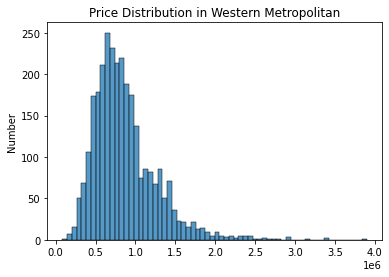

In [93]:
sns.histplot(data=western_metropolitan).set(title="Price Distribution in Western Metropolitan")
plt.ylabel("Number")

[Text(0.5, 1.0, 'Southern Metropolitan')]

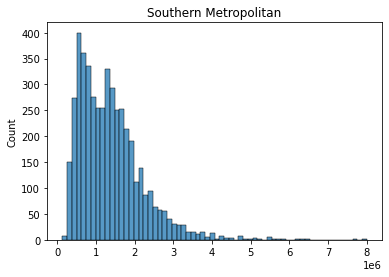

In [96]:
sns.histplot(data=southern_metropolitan).set(title="Southern Metropolitan")

### Q5. Who are the top 5 agencies( how many properties have sold).

In [124]:
house.groupby("SellerG")["SellerG"].count().sort_values(ascending=False).head(5)

SellerG
Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
Name: SellerG, dtype: int64

In [145]:
top5=house.loc[house.SellerG.isin(["Nelson","Jellis","hockingstuart","Barry","Ray"])].groupby(by=["SellerG","Type"])["Type"].count().reset_index(name="count")
top5

,SellerG,Type,count
0,Barry,h,820
1,Barry,t,74
2,Barry,u,117
3,Jellis,h,875
4,Jellis,t,129
5,Jellis,u,312
6,Nelson,h,1160
7,Nelson,t,134
8,Nelson,u,271
9,Ray,h,528


[Text(0.5, 1.0, 'Listed Properties Numbers of Top 5 Agnecy')]

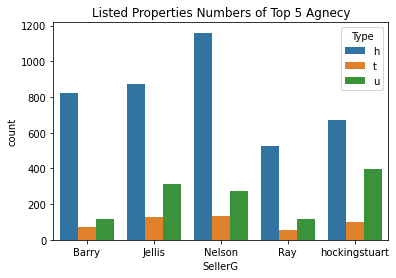

In [148]:
sns.barplot(data=top5,x="SellerG",y="count",hue="Type").set(title="Listed Properties Numbers of Top 5 Agnecy")

#### The top 5 seller is Nelson, Jellis, hockingstuart ,Barry and Ray. Most of the properties they sold is house.

### Q6. What is percentage of different property types in Melbourne?

In [105]:
type_number=house.groupby("Type")["Type"].count()
type_number

Type
h    9449
t    1114
u    3017
Name: Type, dtype: int64

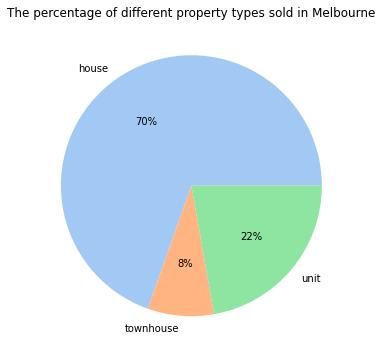

In [110]:
labels=["house","townhouse","unit"]
colors=sns.color_palette("pastel")[0:3]
pie,ax=plt.subplots(figsize=(10,6))
plt.pie(type_number,labels=labels,colors=colors,autopct="%.0f%%")
plt.title("The percentage of different property types sold in Melbourne")
plt.show()